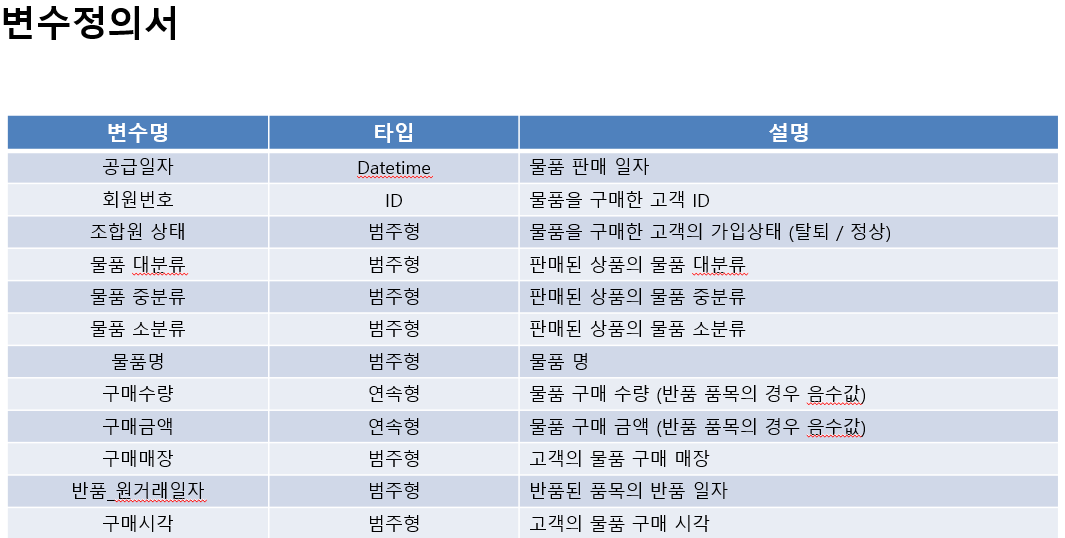


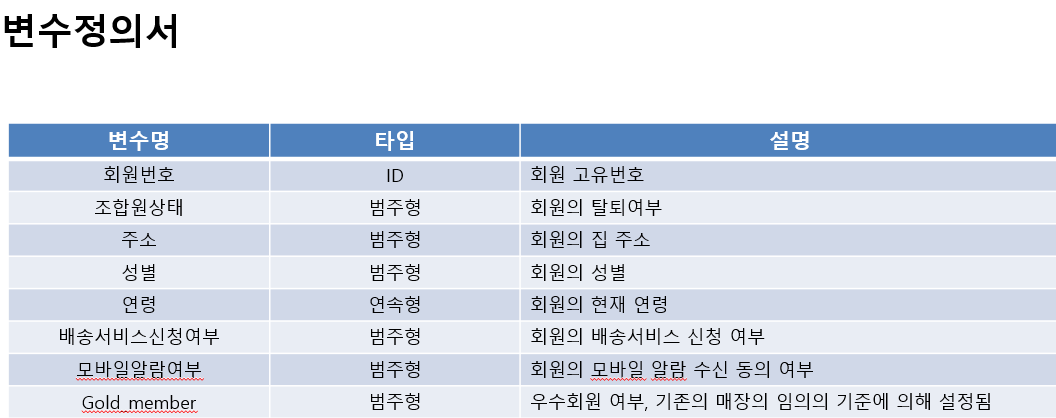

In [ ]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
#한글 폰트 적용
matplotlib.rc('font', family='Malgun Gothic')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import omni_normtest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 


## <font color='Blue'><div style="text-align: left"> 요일별 {상품판매수, 상품 매출액, 매출액} </font> 


In [ ]:
df = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_member_data.csv',engine='python',encoding='euc-kr')
df.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
df.dtypes

Unnamed: 0       int64
공급일자            object
회원번호             int64
조합원상태           object
물품대분류           object
물품중분류           object
물품소분류           object
물품명             object
구매수량           float64
구매금액             int64
구매매장            object
반품_원거래일자       float64
구매시각            object
hour             int64
연령               int64
연령대              int64
주소              object
성별              object
배송서비스신청여부       object
모바일알람여부         object
Gold_member     object
dtype: object

In [ ]:
df_m = df[['공급일자','물품대분류','구매금액']]
df_m.head()

,공급일자,물품대분류,구매금액
0,2018-01-02,과실,22207
1,2018-01-02,간식,4403
2,2018-01-02,채소,7083
3,2018-01-02,축산물,7849
4,2018-01-02,양념/가루,15507


In [ ]:
df_m['공급일자'] = df_m['공급일자'].astype('datetime64[ns]')
df_m.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,공급일자,물품대분류,구매금액
0,2018-01-02,과실,22207
1,2018-01-02,간식,4403
2,2018-01-02,채소,7083
3,2018-01-02,축산물,7849
4,2018-01-02,양념/가루,15507


In [ ]:
df_m.dtypes

공급일자     datetime64[ns]
물품대분류            object
구매금액              int64
dtype: object

In [ ]:
df_m['요일'] = df_m['공급일자'].dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_m.head()

,공급일자,물품대분류,구매금액,요일
0,2018-01-02,과실,22207,Tuesday
1,2018-01-02,간식,4403,Tuesday
2,2018-01-02,채소,7083,Tuesday
3,2018-01-02,축산물,7849,Tuesday
4,2018-01-02,양념/가루,15507,Tuesday


In [ ]:
#요일별 매출액
df_m_t = df_m[['요일','구매금액']]
df_m_t.head()

,요일,구매금액
0,Tuesday,22207
1,Tuesday,4403
2,Tuesday,7083
3,Tuesday,7849
4,Tuesday,15507


In [ ]:
ax = df_m_t.groupby('요일').sum()

In [ ]:
index = {'index' : [4,0,5,6,3,1,2]}
index = pd.DataFrame(index)
index

,index
0,4
1,0
2,5
3,6
4,3
5,1
6,2


In [ ]:
ax.reset_index(inplace=True)
ax['index'] = index['index']

In [ ]:
ax

,요일,구매금액,index
0,Friday,495985578,4
1,Monday,582803486,0
2,Saturday,475671384,5
3,Sunday,253977114,6
4,Thursday,477440487,3
5,Tuesday,491190414,1
6,Wednesday,478087960,2


In [ ]:
# ax.drop('level_0',axis=1,inplace=True)

KeyError: ignored

In [ ]:
ax = ax.sort_values(by='index')
ax

,요일,구매금액,index
1,Monday,582803486,0
5,Tuesday,491190414,1
6,Wednesday,478087960,2
4,Thursday,477440487,3
0,Friday,495985578,4
2,Saturday,475671384,5
3,Sunday,253977114,6


In [ ]:
ax.drop('index',axis=1,inplace=True)
ax

,요일,구매금액
1,Monday,582803486
5,Tuesday,491190414
6,Wednesday,478087960
4,Thursday,477440487
0,Friday,495985578
2,Saturday,475671384
3,Sunday,253977114


In [ ]:
# for i in range(len(ax)):
#   if ax.iloc[i][0] == 'Monday':
#     ax.iloc[i][2] = 10
#   elif ax.iloc[i][0] == 'Tuesday':
#     ax.iloc[2][i] = 1
#   elif ax.iloc[0][i] == 'Wednesday':
#     ax.iloc[2][i] = 2
#   elif ax.iloc[0][i] == 'Thursday':
#     ax.iloc[2][i] = 3
#   elif ax.iloc[0][i] == 'Friday':
#     ax.iloc[2][i] = 4
#   elif ax.iloc[0][i] == 'Saturday':
#     ax.iloc[2][i] = 5
#   elif ax.iloc[0][i] == 'Sunday':
#     ax.iloc[2][i] = 6 
# ax   

In [ ]:
# ax.sort_values('요일')
# ax.head()

,구매금액
요일,
Friday,495985578
Monday,582803486
Saturday,475671384
Sunday,253977114
Thursday,477440487


In [ ]:
ax.set_index('요일',inplace=True)
ax

,구매금액
요일,
Monday,582803486
Tuesday,491190414
Wednesday,478087960
Thursday,477440487
Friday,495985578
Saturday,475671384
Sunday,253977114


Text(0, 0.5, '판매량')

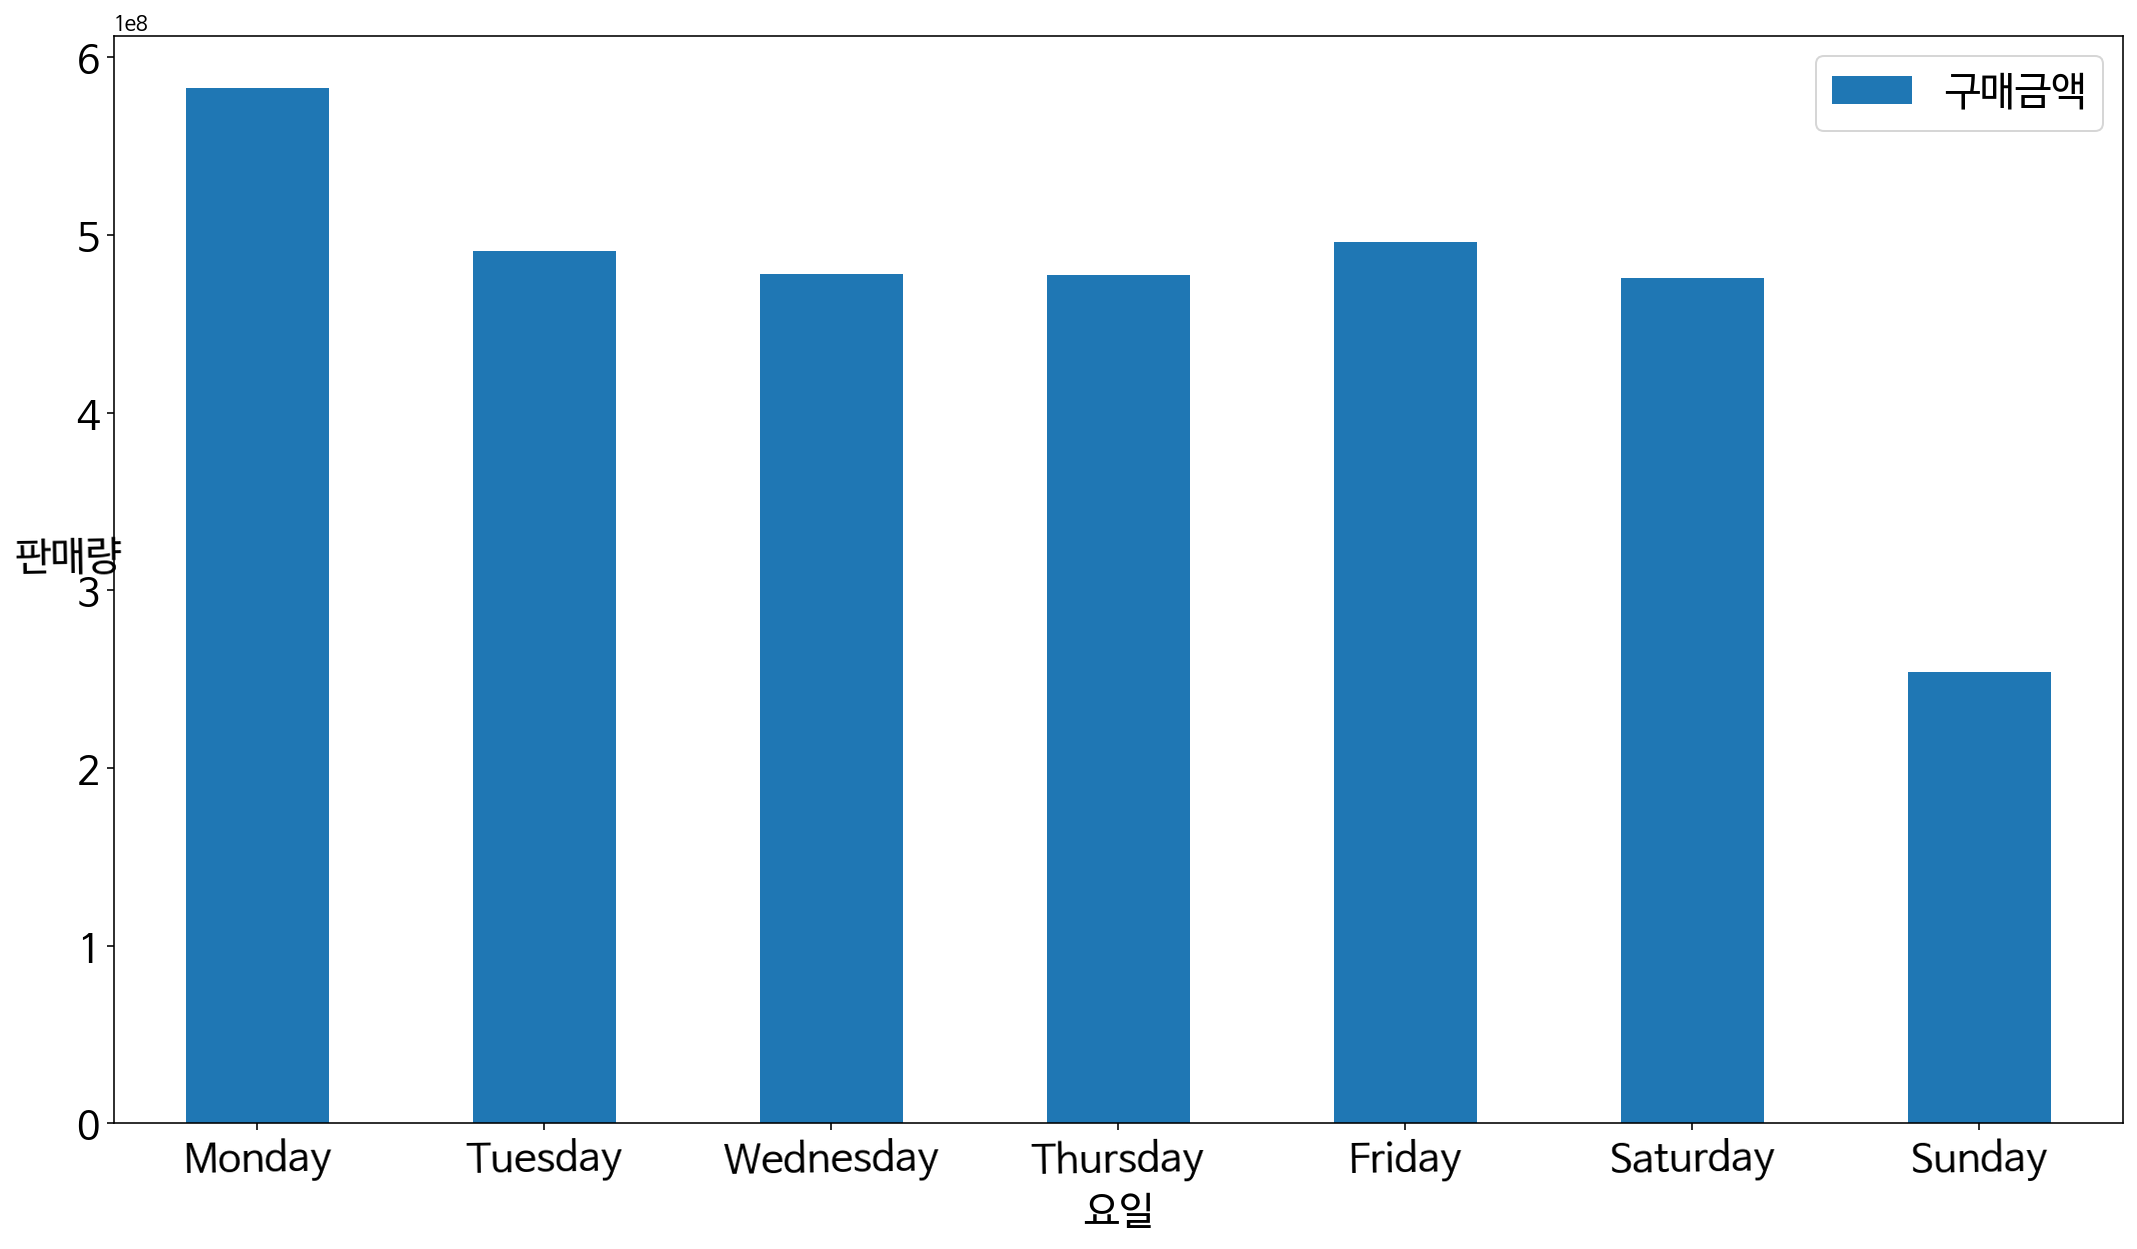

In [ ]:
ax.plot.bar(figsize=(18,10),fontsize = 20)
plt.xticks(rotation = True)
plt.xlabel('요일', fontsize = 20)
plt.legend(['구매금액'], fontsize = 20)
plt.ylabel('판매량', rotation = True, fontsize = 20)    

In [ ]:
#상품판매수
df_m.head()

,공급일자,물품대분류,구매금액,요일
0,2018-01-02,과실,22207,Tuesday
1,2018-01-02,간식,4403,Tuesday
2,2018-01-02,채소,7083,Tuesday
3,2018-01-02,축산물,7849,Tuesday
4,2018-01-02,양념/가루,15507,Tuesday


In [ ]:
df_m_n = pd.get_dummies(df_m['물품대분류'])
df_m_n['요일'] = df_m['요일']
df_m_n.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식,요일
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tuesday
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tuesday
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Tuesday
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Tuesday
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Tuesday


In [ ]:
df_m_n = df_m_n.groupby('요일').sum()
df_m_n.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
요일,,,,,,,,,,,,,,,,
Friday,6912.0,417.0,1499.0,50.0,5740.0,1521.0,621.0,3097.0,1946.0,1941.0,506.0,624.0,68.0,11841.0,7993.0,1.0
Monday,8255.0,522.0,1508.0,24.0,6654.0,1997.0,719.0,3721.0,2533.0,2481.0,681.0,814.0,76.0,13409.0,9554.0,0.0
Saturday,6438.0,403.0,1380.0,42.0,4999.0,1562.0,596.0,2685.0,1867.0,1990.0,548.0,728.0,90.0,11585.0,7437.0,0.0
Sunday,4120.0,253.0,564.0,19.0,2807.0,1024.0,262.0,1572.0,1169.0,1258.0,329.0,460.0,49.0,5146.0,4080.0,0.0
Thursday,6903.0,413.0,1329.0,51.0,5203.0,1559.0,598.0,3062.0,2060.0,2000.0,610.0,694.0,59.0,11499.0,7671.0,0.0


In [ ]:
df_m_n = df_m_n.drop(['기타','주류','주곡','잡곡','서류'],axis=1)
df_m_n.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
요일,,,,,,,,,,,
Friday,6912.0,417.0,1499.0,5740.0,1521.0,3097.0,1946.0,1941.0,11841.0,7993.0,1.0
Monday,8255.0,522.0,1508.0,6654.0,1997.0,3721.0,2533.0,2481.0,13409.0,9554.0,0.0
Saturday,6438.0,403.0,1380.0,4999.0,1562.0,2685.0,1867.0,1990.0,11585.0,7437.0,0.0
Sunday,4120.0,253.0,564.0,2807.0,1024.0,1572.0,1169.0,1258.0,5146.0,4080.0,0.0
Thursday,6903.0,413.0,1329.0,5203.0,1559.0,3062.0,2060.0,2000.0,11499.0,7671.0,0.0


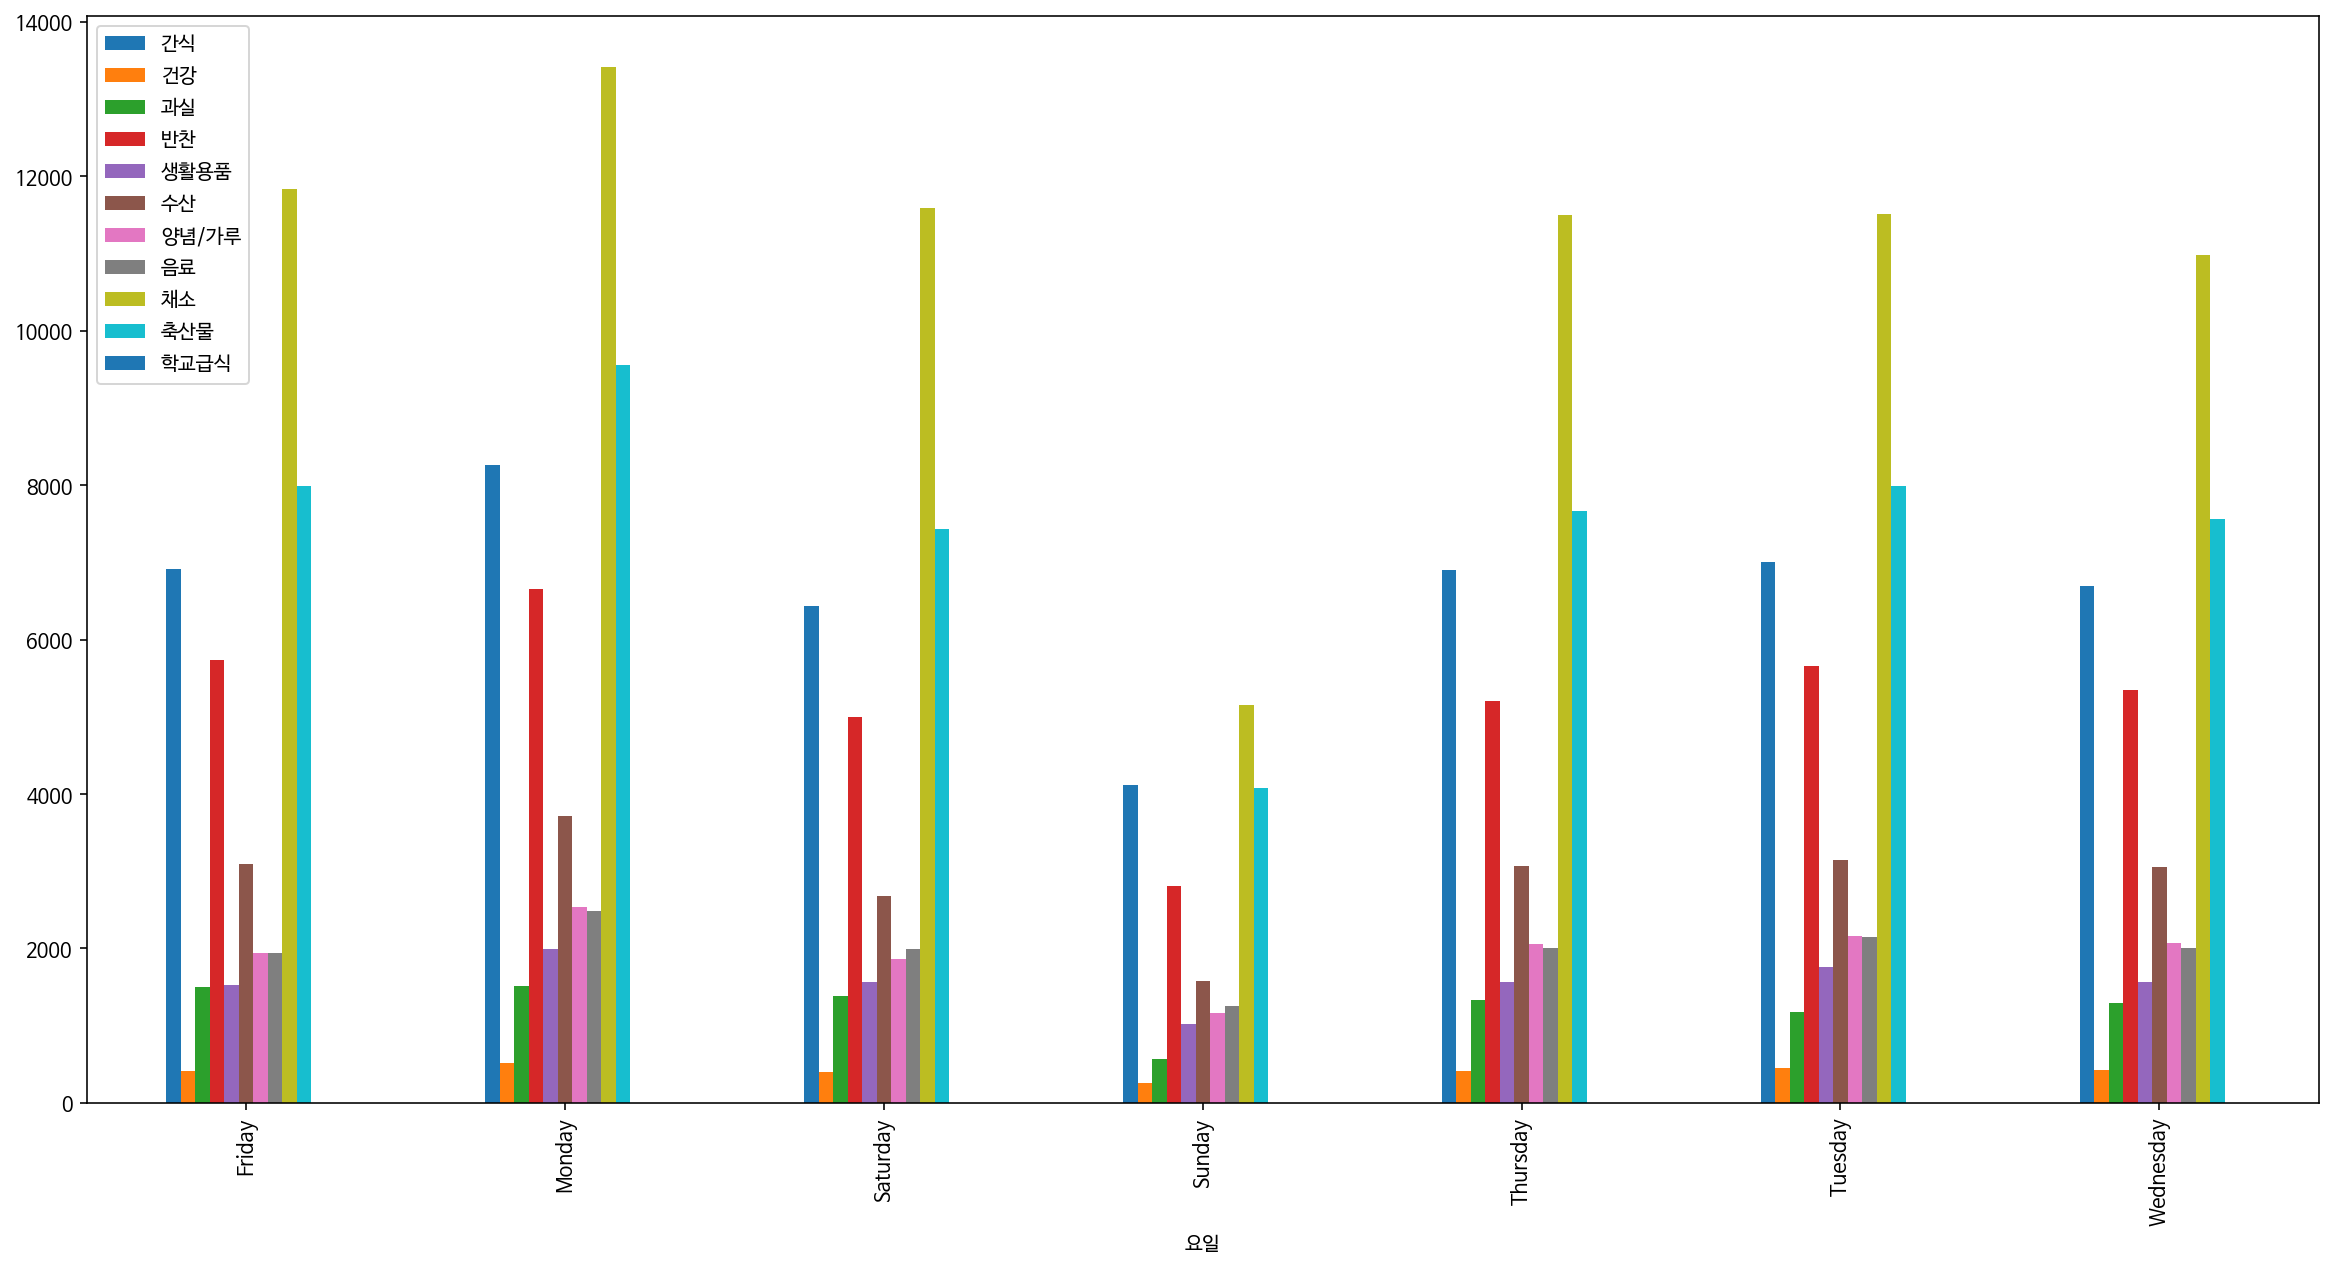

In [ ]:
df_m_n.plot.bar(figsize = (20,10))

In [ ]:
df_m = df_m.groupby('월').sum()